In [1]:
import sys
sys.path.append("../")

import keras
from keras.models import load_model
import matplotlib.pyplot as plt
from nltk.corpus import words
import numpy as np
from tqdm import tqdm

import src.generator as g

Using TensorFlow backend.


In [2]:
model = load_model("../models/model_long.h5")
model.summary()

en_words = words.words()
generator = g.Generator()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 8)                 1184      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,193
Trainable params: 1,193
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.save_weights("../models/weights.h5")

In [3]:
import string

def get_arr_from_text(text):
    text = text.lower()
    return generator.postprocess(generator.map_to_chars(text))

def split(word):
        return [char for char in word]

def clean_text(word):
    rem_chars = [x for x in split(word) if x not in string.ascii_lowercase]
    for char in rem_chars:
        word = word.replace(char, "")
    return word

def predict_word_from_model(word):
    word = clean_text(word)
    return model.predict(np.asarray([get_arr_from_text(word)]))

In [4]:
values = list(map(lambda x: (x, predict_word_from_model(x)), tqdm(en_words)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236736/236736 [08:37<00:00, 457.49it/s]


In [8]:
prediction_values = [x[1][0][0] for x in tqdm(values)]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236736/236736 [00:00<00:00, 1249863.43it/s]


In [9]:
print(prediction_values[:10])

[0.9969734, 0.3584937, 0.7428166, 0.447648, 0.42647403, 0.46689478, 0.17135365, 0.30345452, 0.28241378, 0.012728022]


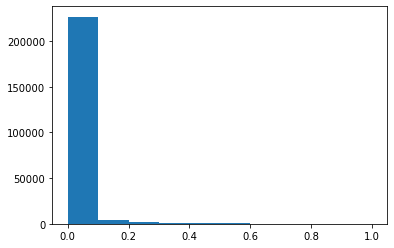

In [19]:
plt.hist(prediction_values)
plt.show()

In [15]:
vals_sorted = sorted(values, key=lambda x: x[1][0][0])

In [18]:
for x in vals_sorted[-100:]:
    print(f"{x[0]}: {x[1][0][0]}")

qubba: 0.9721112847328186
Guy: 0.97263103723526
Ormazd: 0.9728795289993286
xi: 0.9732816815376282
Liukiu: 0.9733715057373047
stradld: 0.9735307693481445
Nejdi: 0.9735784530639648
mho: 0.9737343788146973
Awshar: 0.9751944541931152
tyg: 0.9753841757774353
kuvasz: 0.9760398864746094
z: 0.9774845242500305
Luc: 0.9777255058288574
Ernst: 0.9779112935066223
Wezn: 0.9782620668411255
mutsje: 0.9785367250442505
Zulhijjah: 0.9787702560424805
cafh: 0.97957843542099
nabk: 0.979977548122406
vrbaite: 0.9802510142326355
miaow: 0.9806963801383972
Ods: 0.9818729758262634
Uds: 0.9818729758262634
Osc: 0.982284665107727
Emm: 0.9825535416603088
Stokavski: 0.9825953245162964
Mordv: 0.9828091263771057
uayeb: 0.9834144711494446
Suu: 0.9838972091674805
satlijk: 0.9866238236427307
Arzava: 0.9866824150085449
Chakavski: 0.9869468212127686
Igdyr: 0.9871814846992493
qoph: 0.988149881362915
qintar: 0.989330530166626
fyrd: 0.9893414974212646
itcze: 0.9900686144828796
uruisg: 0.9903780221939087
Cymry: 0.990691065788269

In [27]:
predict_word_from_model("wfsdfsd")

array([[0.9999982]], dtype=float32)